<a href="https://colab.research.google.com/github/Imran-co/Imran/blob/main/SCT_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# One-hot encode labels
y = keras.utils.to_categorical(y, 10)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8636 - loss: 0.4693 - val_accuracy: 0.9556 - val_loss: 0.1493
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1170 - val_accuracy: 0.9671 - val_loss: 0.1083
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0782 - val_accuracy: 0.9697 - val_loss: 0.1043
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0575 - val_accuracy: 0.9691 - val_loss: 0.1010
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9765 - val_loss: 0.0815
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0781
Test Accuracy: 0.9765


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


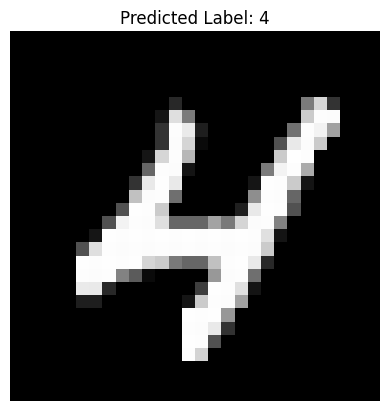

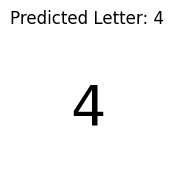

In [4]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    predicted_letter = str(prediction)


    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()


# Test with a random image
predict_image(9000)
